In [1]:
# Simple Numerical Laplace Equation Solution using Finite Difference Method
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

plt.rcParams["figure.figsize"] = (18,10)

#identify your working directory
!pwd

/Users/wayne/Desktop/School/Year 1 Sem 2/PHYS 206L/Exp 06 Electric field plotting


### Define the electrodes

In [2]:
# Set Dimension and delta
dimX = 280
dimY = 200
tot_elements = dimX*dimY
delt = 1
maxIter = 5000

# Boundary condition
Vplus =15
Vminus = 0

# Populate grid with values somewhere in between the min and max of the electrode values
startVals = np.random.uniform(Vminus,Vplus,size = (dimY,dimX))

#Initialize the relaxation matrix with these random values
L = startVals
#print(L)

# Set meshgrid. Needed for when you want to do the contour plot
Xx, Yy = np.meshgrid(np.arange(0, dimX), np.arange(0, dimY))

### Coaxial cable

In [3]:
#Define Positive Electrode
r = 20

#Define Grounded Electrode
ra = 90
rb = 98

elec1_1 = np.array([[-1, -1]])
elec1_2 = np.array([[-1, -1]])

for x in range(dimX):
    for y in range(dimY):
        if ((x-140)**2+(y-100)**2)<=r**2:
            elec1_1 = np.append(elec1_1, [[x,y]], axis=0)
        if ((x-140)**2+(y-100)**2)>=ra**2 and ((x-140)**2+(y-100)**2)<=rb**2:
            elec1_2 = np.append(elec1_2, [[x,y]], axis=0)

elec1_1 = np.delete(elec1_1, 0, axis=0)
elec1_2 = np.delete(elec1_2, 0, axis=0)

# for x in range(dimX):
#     for y in range(dimY):
#         if np.sqrt((x-50)**2+(y-50)**2)<=10:
#             elec1 = np.append(elec1, [x,y])
#             L[y,x]=Vplus
#         if np.sqrt((x-150)**2+(y-150)**2)<=10:
#             elec2 = np.append(elec2, [x,y])
#             L[y,x]=Vminus

# Periodic boundary conditions

Periodic boundary conditions are a way of handling the edges of a grid upon which you are performing an iterative calculation. It can speed up convergence and simulate an infinite grid extending out to infinity. The idea is that you consider the edge of your grid as being physically adjacent to the opposite side of your grid.

Be aware that if you have features of your simulation of finite size within your grid that have effects past the edge, it will create a mirroring effect that may not be physically realistic. In that case, you may want to go to a larger grid or go to free boundary conditions.

In [4]:
#See the starting grid if you want
#print(L)

In [5]:
#Set up the stop conditions
stopCondition = 0.000000001  # % Difference between successive averages of all the elements
#Change the above if you want to relax or tighten the stop condition
#previously 0.00001

oldaverage = 0
oldval = 0
done = False
iterate = 0

In [6]:
print("Patience, Grasshopper...", end = "")

for x in range(dimX):
    for y in range(dimY):
        a = np.array([x,y])
        if (a == elec1_1).all(axis = 1).any():
            L[y,x]=Vplus
        if (a == elec1_2).all(axis = 1).any():
            L[y,x]=Vminus

while (iterate<maxIter) and (done == False):    #Number of times to loop through relaxation
    iterate = iterate + 1
    for x in range (0,dimX):
        for y in range (0,dimY):
            # a = np.array([x,y])
            #These statements build the logical output to determine if (x,y) is on an electrode        
            bc1 = ((x-140)**2+(y-100)**2)<=r**2
            bc2 = ((x-140)**2+(y-100)**2)>=ra**2 and ((x-140)**2+(y-100)**2)<=rb**2
            bc = (bc1 or bc2)
            #print(x,y,bc, L[y,x]) In case something goes wrong

            #This applies the relaxation, provided you are not on an electrode.
            if bc:
                # print('iter = ' + str(iterate) + ' loop broken x = ' + str(x) + ' y = ' + str(y))
                continue

            # print('iter = ' + str(iterate) + ' loop NOT broken x = ' + str(x) + ' y = ' + str(y))
                        
            if (x==dimX-1):            #Handle the PBC at array end (x)
                xplus = 0
            else:
                xplus = x+1        
            if (y==dimY-1):             #Handle the PBC at array end (y)
                yplus = 0
            else:
                yplus = y+1

            L[y,x]=0.25*(L[y][xplus]+L[y][x-1]+L[y-1][x]+L[yplus][x])            

#Set up convergence condition
    if ((iterate)%(maxIter/50) == 0):
        print(int(100*(iterate)/maxIter), end = "%..",)
#       print(abs(newval - oldval))

    newaverage = np.sum(L)/tot_elements
    newval = 100*abs((newaverage - oldaverage)/newaverage)
    done = abs(newval-oldval)<stopCondition
#    print('New: ',newaverage,'Old: ',oldaverage)
    oldaverage = newaverage
    oldval = newval

print("There is an ending.")
print('Iterations to converge: ',iterate)
print('Final grid average: ',oldaverage)

Patience, Grasshopper...2%..4%..6%..8%..10%..12%..14%..16%..18%..20%..22%..24%..26%..28%..30%..32%..34%..36%..38%..40%..42%..44%..46%..48%..50%..52%..54%..56%..58%..60%..62%..64%..66%..68%..70%..72%..74%..76%..78%..80%..82%..84%..86%..88%..90%..92%..94%..96%..98%..100%..There is an ending.
Iterations to converge:  5000
Final grid average:  2.550725374338481


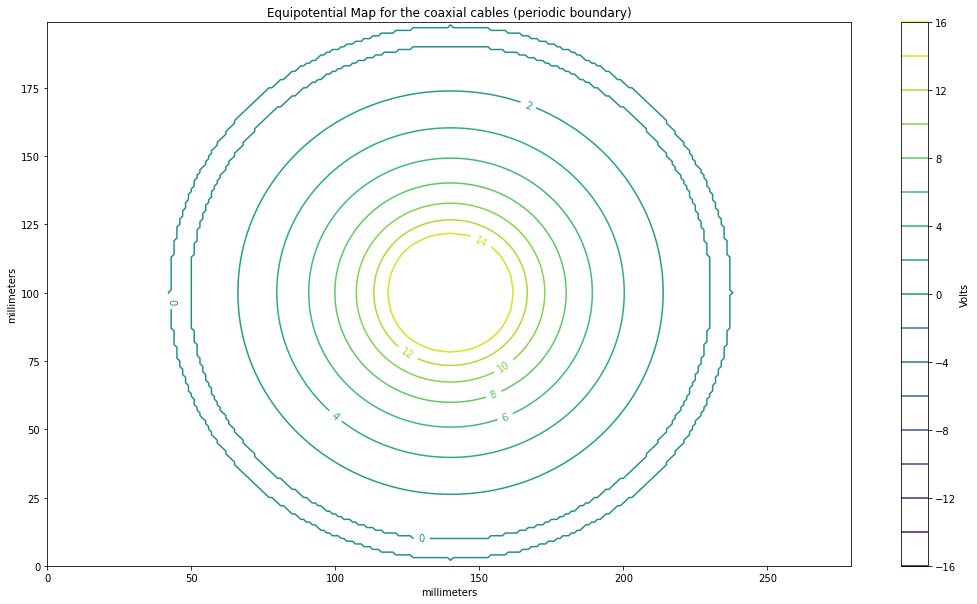

In [7]:
# Configure the contour
plt.title("Equipotential Map for the coaxial cables (periodic boundary)")
# plt.contourf(Xx, Yy, L)
#levels = np.arange(0,20)
#levels = [0, 5, 10,15,19.9]
#level = np.append(levels,0.999*Vplus)

levels = np.arange(-16,17,2)

cs = plt.contour(Xx, Yy, L,levels)
#Set Colorbar
plt.colorbar(label='Volts')
plt.xlabel('millimeters')
plt.ylabel('millimeters')
plt.clabel(cs, inline='1', fontsize=10)
#plt.grid()
#print("")

#Save the figure
plt.savefig("Exp_06 3.1.png")

# Show the result in the plot window
plt.show()

# Free boundary conditions

Free boundary conditions are used when periodic boundary conditions will produce inaccurate results, or free boundary conditions more accurately represent the physical situation.

In [8]:
# Set New Dimension and delta
#dimX = 100
#dimY = 100
#delt = 1

# Populate grid with value somewhere in between the min and max of the electrode values
Tguess = 0

In [9]:
# Set meshgrid. Needed for when you want to do the contour plot
#Xx, Yy = np.meshgrid(np.arange(0, dimX), np.arange(0, dimY))

# Set array size and set the interior value with Tguess
Lf = np.empty((dimY, dimX))   #We do this because of how array displays in python.
Lf=startVals
print(Lf)

[[1.88037329 1.87961551 1.87796444 ... 1.87659596 1.87851912 1.87954925]
 [1.88001311 1.87925529 1.8776041  ... 1.87623548 1.87815884 1.8791891 ]
 [1.8791718  1.87841391 1.87676239 ... 1.87539303 1.87731711 1.87834782]
 ...
 [1.87787864 1.87712106 1.87546968 ... 1.87409868 1.87602356 1.8770549 ]
 [1.87896177 1.87820423 1.87655336 ... 1.87518401 1.87710756 1.87813803]
 [1.87956428 1.87880676 1.87715618 ... 1.87578788 1.87771061 1.87874054]]


In [10]:
# Uncomment to change the electrode shape if you wish
#Define Positive Electrode
#posVx = 48
#posVxL = 4
#posVy = 40
#posVyL = 4
#Define Negative Electrode
#negVx = 48
#negVxL = 4
#negVy = 56 
#negVyL = 4

#Set voltage on electrodes
for x in range(dimX):
    for y in range(dimY):
        a = np.array([x,y])
        if (a == elec1_1).all(axis = 1).any():
            L[y,x]=Vplus
        if (a == elec1_2).all(axis = 1).any():
            L[y,x]=Vminus

In [11]:
stopCondition = 0.000000001 #previously 0.0000001
oldaverage = 0
oldval = 0
done = False
iteration = 0

In [12]:
print("Patience, Grasshopper..",end ="")    

while (iteration<maxIter) and (done == False):            
    iteration = iteration + 1
    #Loop through center of array
    for x in range (1,dimX-1):
        for y in range (1,dimY-1):

         #These statements build the logical output to determine if (x,y) is on an electrode
            bc1 = ((x-140)**2+(y-100)**2)<=r**2
            bc2 = ((x-140)**2+(y-100)**2)>=ra**2 and ((x-140)**2+(y-100)**2)<=rb**2
            bc = (bc1 or bc2)
            #print(x,y,bc, Lf[y,x])

        #This applies the relaxation provided you are not on an electrode.
            if (not bc):
                Lf[y,x]=0.25*(Lf[y][x+1]+Lf[y][x-1]+Lf[y-1][x]+Lf[y+1][x])

  #Loop through top of array
    ytop = 0
    for x in range(0,dimX-1):
        if (x==0):
            Lf[0,0] = 0.5*(Lf[1][0]+Lf[0][1])
        else:
            Lf[ytop,x]= (1/3)*(Lf[ytop][x-1]+Lf[ytop][x+1]+Lf[1][x])

#Loop through right side of array
    xright = dimX-1
    for y in range(0,dimY-1):
        if (y==0):
            Lf[0,xright] = 0.5*(Lf[0][dimX-2]+Lf[1][dimX-1])
        else:
            Lf[y,xright]=(1/3)*(Lf[y-1][xright]+Lf[y+1][xright]+Lf[y][xright-1])
            
#Loop through bottom of array
    ybottom = dimY-1
    for x in range(dimX-1,0,-1):
        if (x==dimX-1):
            Lf[ybottom,dimX-1]=0.5*(Lf[ybottom][dimX-2]+Lf[ybottom-1][dimX-1])
        else:
            Lf[ybottom,x] = (1/3)*(Lf[ybottom][x+1]+Lf[ybottom][x-1]+Lf[ybottom-1][x])
            
#Loop through left side of array
    xleft = 0
    for y in range(dimY-1,0,-1):
        if (y==dimY-1):
            Lf[dimY-1,xleft] = 0.5*(Lf[dimY-1][1]+Lf[dimY-2][0])
        else:
            Lf[y,xleft] = (1/3)*(Lf[y+1][xleft]+Lf[y-1][xleft]+Lf[y][xleft+1])

#Print progress bar                
    if ((iteration+1)%(maxIter/50) == 0):
        print(int(100*(iteration+1)/maxIter), end = "%..")

    newaverage = np.sum(Lf)/tot_elements
    newval = 100*abs((newaverage - oldaverage)/newaverage)
    done = abs(newval-oldval)<stopCondition
    #print('New: ',newaverage,'Old: ',oldaverage)
    #print(newval-oldval)
    oldaverage = newaverage
    oldval = newval

       
print("There is an ending.")

Patience, Grasshopper..2%..4%..6%..8%..10%..12%..14%..16%..18%..20%..22%..24%..26%..28%..30%..32%..34%..36%..38%..40%..42%..44%..46%..48%..50%..52%..54%..56%..58%..60%..62%..64%..66%..68%..70%..72%..74%..76%..78%..80%..82%..84%..86%..88%..90%..92%..94%..96%..98%..100%..There is an ending.


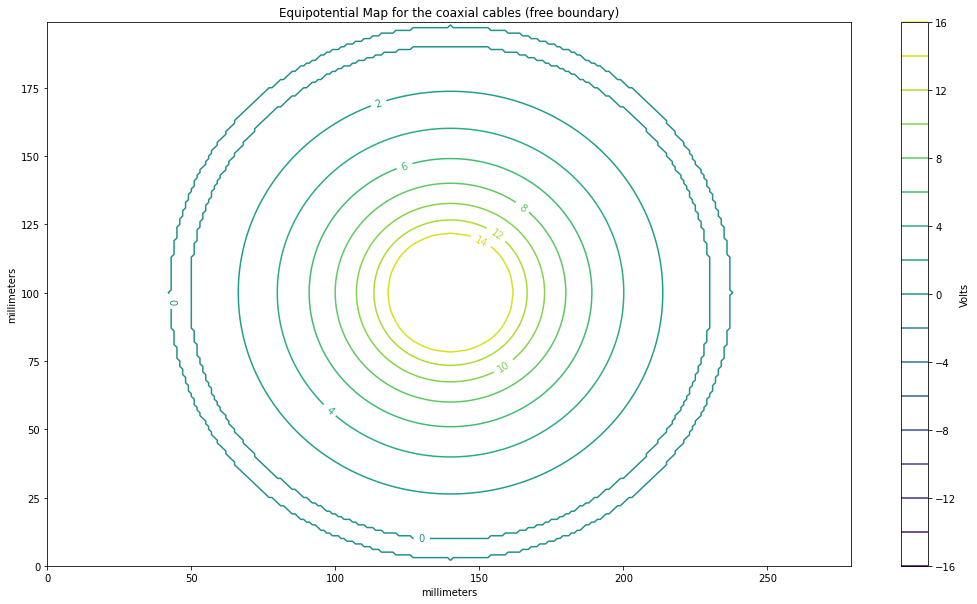

In [13]:
# Set meshgrid. Needed for when you want to do the contour plot
X1, Y1 = np.meshgrid(np.arange(0, dimX), np.arange(0, dimY))

# Configure the contour
plt.title("Equipotential Map for the coaxial cables (free boundary)")

levels = np.arange(-16,17,2)

cs = plt.contour(Xx, Yy, Lf,levels)
#Set Colorbar
plt.colorbar(label='Volts')
plt.xlabel('millimeters')
plt.ylabel('millimeters')
plt.clabel(cs, inline='1', fontsize=10)
#plt.grid()
#print("")

#Save the figure
plt.savefig("Exp_06 3.2.png")

# Show the result in the plot window
plt.show()

In [14]:
# levels

# contourlines.collections

# D, E = np.meshgrid(np.arange(0, dimX), np.arange(0, dimY))


#This creates a 3D contour plot that is rotatable. It does weird things to the rest of the notebook though.
#plt.rcParams["figure.figsize"] = (10,10)
#%matplotlib notebook
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.contour(D, E, Lf,75,cmap='binary')
#ax.view_init(elev=0,azim=10)
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')
#ax.set_title('3D contour')
#plt.show()

#You can grab and move the 3 dimensional image below